In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [46]:
### keras model 만들기
## 1) 데이터셋 생성
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [47]:
xtrain = xtrain.reshape(60000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0

In [48]:
# 원핫인코딩
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [49]:
## 2) model 구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [50]:
## 3) 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
## 4) model 학습
hist = model.fit(xtrain,ytrain,epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.6608 - accuracy: 0.8319
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3452 - accuracy: 0.9023
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.2983 - accuracy: 0.9155
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2694 - accuracy: 0.9239
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2470 - accuracy: 0.9304


In [52]:
## 5) cost, accuracy 측정
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.660846442190806, 0.3452354679663976, 0.29834899283448857, 0.26937211222449936, 0.24702843420406181]
[0.8319167, 0.9023, 0.9155, 0.92391664, 0.93043333]


In [53]:
## 6) model 평가
res = model.evaluate(xtest,ytest, batch_size=32)

10000/10000 [==============================] - 0s 23us/step


In [54]:
xhat = xtest[0:1]
yhat = model.predict(xhat)
yhat

array([[1.4842747e-04, 9.0432344e-08, 8.8094396e-04, 9.0934383e-03,
        7.3074608e-07, 8.2192841e-05, 1.3494588e-08, 9.8891371e-01,
        3.9105482e-05, 8.4119523e-04]], dtype=float32)

In [19]:
import numpy as np
np.random.seed(3)

In [55]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

xval = xtrain[50000:]
yval = ytrain[50000:]

xtrain = xtrain[:50000]
ytrain = ytrain[:50000]

In [56]:
xtrain = xtrain.reshape(50000,784).astype('float32')/255.0
xval = xval.reshape(10000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0

In [57]:
tri = np.random.choice(50000,700)
vri = np.random.choice(10000,300)

In [58]:
xtrain = xtrain[tri]
ytrain = ytrain[tri]
xval = xval[vri]
yval = yval[vri]

In [59]:
ytrain = np_utils.to_categorical(ytrain)
yval = np_utils.to_categorical(yval)
ytest = np_utils.to_categorical(ytest)

In [60]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [62]:
hist = model.fit(xtrain,ytrain,epochs=3000,batch_size=10, validation_data=(xval,yval))

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 229us/step - loss: 2.3128 - accuracy: 0.0886 - val_loss: 2.3054 - val_accuracy: 0.0933
Epoch 2/3000
700/700 [==============================] - 0s 117us/step - loss: 2.2974 - accuracy: 0.1371 - val_loss: 2.2900 - val_accuracy: 0.1500
Epoch 3/3000
700/700 [==============================] - 0s 117us/step - loss: 2.2486 - accuracy: 0.1686 - val_loss: 2.2056 - val_accuracy: 0.2067
Epoch 4/3000
700/700 [==============================] - 0s 113us/step - loss: 2.1713 - accuracy: 0.2300 - val_loss: 2.1372 - val_accuracy: 0.2267
Epoch 5/3000
700/700 [==============================] - 0s 113us/step - loss: 2.1005 - accuracy: 0.2586 - val_loss: 2.0720 - val_accuracy: 0.2600
Epoch 6/3000
700/700 [==============================] - 0s 114us/step - loss: 2.0417 - accuracy: 0.2629 - val_loss: 2.0191 - val_accuracy: 0.2933
Epoch 7/3000
700/700 [==============================] - 0s 114us/step - loss: 

Epoch 112/3000
700/700 [==============================] - 0s 109us/step - loss: 1.1356 - accuracy: 0.5586 - val_loss: 1.5575 - val_accuracy: 0.4667
Epoch 113/3000
700/700 [==============================] - 0s 104us/step - loss: 1.1342 - accuracy: 0.5571 - val_loss: 1.5632 - val_accuracy: 0.4733
Epoch 114/3000
700/700 [==============================] - 0s 104us/step - loss: 1.1317 - accuracy: 0.5629 - val_loss: 1.5631 - val_accuracy: 0.4633
Epoch 115/3000
700/700 [==============================] - 0s 111us/step - loss: 1.1290 - accuracy: 0.5571 - val_loss: 1.5676 - val_accuracy: 0.4633
Epoch 116/3000
700/700 [==============================] - 0s 110us/step - loss: 1.1284 - accuracy: 0.5614 - val_loss: 1.5632 - val_accuracy: 0.4667
Epoch 117/3000
700/700 [==============================] - 0s 101us/step - loss: 1.1249 - accuracy: 0.5643 - val_loss: 1.5604 - val_accuracy: 0.4767
Epoch 118/3000
700/700 [==============================] - 0s 93us/step - loss: 1.1227 - accuracy: 0.5686 - val_l

700/700 [==============================] - 0s 104us/step - loss: 0.9708 - accuracy: 0.6257 - val_loss: 1.6843 - val_accuracy: 0.4700
Epoch 223/3000
700/700 [==============================] - 0s 107us/step - loss: 0.9691 - accuracy: 0.6300 - val_loss: 1.6741 - val_accuracy: 0.4733
Epoch 224/3000
700/700 [==============================] - 0s 109us/step - loss: 0.9690 - accuracy: 0.6314 - val_loss: 1.6772 - val_accuracy: 0.4700
Epoch 225/3000
700/700 [==============================] - 0s 109us/step - loss: 0.9674 - accuracy: 0.6329 - val_loss: 1.6792 - val_accuracy: 0.4700
Epoch 226/3000
700/700 [==============================] - 0s 106us/step - loss: 0.9666 - accuracy: 0.6243 - val_loss: 1.6789 - val_accuracy: 0.4700
Epoch 227/3000
700/700 [==============================] - 0s 106us/step - loss: 0.9656 - accuracy: 0.6271 - val_loss: 1.6826 - val_accuracy: 0.4667
Epoch 228/3000
700/700 [==============================] - 0s 131us/step - loss: 0.9645 - accuracy: 0.6286 - val_loss: 1.6887 - 

700/700 [==============================] - 0s 110us/step - loss: 0.8863 - accuracy: 0.6700 - val_loss: 1.8279 - val_accuracy: 0.4633
Epoch 333/3000
700/700 [==============================] - 0s 107us/step - loss: 0.8855 - accuracy: 0.6657 - val_loss: 1.8475 - val_accuracy: 0.4700
Epoch 334/3000
700/700 [==============================] - 0s 94us/step - loss: 0.8858 - accuracy: 0.6686 - val_loss: 1.8223 - val_accuracy: 0.4733
Epoch 335/3000
700/700 [==============================] - 0s 89us/step - loss: 0.8850 - accuracy: 0.6700 - val_loss: 1.8261 - val_accuracy: 0.4733
Epoch 336/3000
700/700 [==============================] - 0s 90us/step - loss: 0.8834 - accuracy: 0.6757 - val_loss: 1.8407 - val_accuracy: 0.4733
Epoch 337/3000
700/700 [==============================] - 0s 101us/step - loss: 0.8840 - accuracy: 0.6700 - val_loss: 1.8441 - val_accuracy: 0.4733
Epoch 338/3000
700/700 [==============================] - 0s 99us/step - loss: 0.8828 - accuracy: 0.6686 - val_loss: 1.8412 - val_

700/700 [==============================] - 0s 107us/step - loss: 0.8315 - accuracy: 0.6943 - val_loss: 1.9983 - val_accuracy: 0.4633
Epoch 443/3000
700/700 [==============================] - 0s 107us/step - loss: 0.8310 - accuracy: 0.6943 - val_loss: 2.0040 - val_accuracy: 0.4633
Epoch 444/3000
700/700 [==============================] - 0s 96us/step - loss: 0.8308 - accuracy: 0.6943 - val_loss: 2.0084 - val_accuracy: 0.4633
Epoch 445/3000
700/700 [==============================] - 0s 101us/step - loss: 0.8298 - accuracy: 0.6900 - val_loss: 1.9887 - val_accuracy: 0.4567
Epoch 446/3000
700/700 [==============================] - 0s 104us/step - loss: 0.8300 - accuracy: 0.6871 - val_loss: 1.9996 - val_accuracy: 0.4600
Epoch 447/3000
700/700 [==============================] - 0s 107us/step - loss: 0.8285 - accuracy: 0.6914 - val_loss: 2.0227 - val_accuracy: 0.4600
Epoch 448/3000
700/700 [==============================] - 0s 106us/step - loss: 0.8276 - accuracy: 0.6929 - val_loss: 1.9908 - v

700/700 [==============================] - 0s 106us/step - loss: 0.7844 - accuracy: 0.7100 - val_loss: 2.1273 - val_accuracy: 0.4367
Epoch 553/3000
700/700 [==============================] - 0s 113us/step - loss: 0.7840 - accuracy: 0.7071 - val_loss: 2.1385 - val_accuracy: 0.4433
Epoch 554/3000
700/700 [==============================] - 0s 110us/step - loss: 0.7832 - accuracy: 0.7114 - val_loss: 2.1287 - val_accuracy: 0.4500
Epoch 555/3000
700/700 [==============================] - 0s 106us/step - loss: 0.7838 - accuracy: 0.7100 - val_loss: 2.1360 - val_accuracy: 0.4300
Epoch 556/3000
700/700 [==============================] - 0s 109us/step - loss: 0.7829 - accuracy: 0.7086 - val_loss: 2.1421 - val_accuracy: 0.4367
Epoch 557/3000
700/700 [==============================] - 0s 107us/step - loss: 0.7824 - accuracy: 0.7143 - val_loss: 2.1317 - val_accuracy: 0.4400
Epoch 558/3000
700/700 [==============================] - 0s 106us/step - loss: 0.7823 - accuracy: 0.7129 - val_loss: 2.1408 - 

700/700 [==============================] - 0s 110us/step - loss: 0.7509 - accuracy: 0.7171 - val_loss: 2.2965 - val_accuracy: 0.4367
Epoch 663/3000
700/700 [==============================] - 0s 114us/step - loss: 0.7514 - accuracy: 0.7186 - val_loss: 2.2891 - val_accuracy: 0.4367
Epoch 664/3000
700/700 [==============================] - 0s 99us/step - loss: 0.7511 - accuracy: 0.7186 - val_loss: 2.2886 - val_accuracy: 0.4367
Epoch 665/3000
700/700 [==============================] - 0s 110us/step - loss: 0.7505 - accuracy: 0.7243 - val_loss: 2.3024 - val_accuracy: 0.4367
Epoch 666/3000
700/700 [==============================] - 0s 107us/step - loss: 0.7506 - accuracy: 0.7243 - val_loss: 2.3042 - val_accuracy: 0.4367
Epoch 667/3000
700/700 [==============================] - 0s 109us/step - loss: 0.7498 - accuracy: 0.7157 - val_loss: 2.2911 - val_accuracy: 0.4333
Epoch 668/3000
700/700 [==============================] - 0s 110us/step - loss: 0.7511 - accuracy: 0.7186 - val_loss: 2.3174 - v

700/700 [==============================] - 0s 136us/step - loss: 0.7251 - accuracy: 0.7300 - val_loss: 2.4364 - val_accuracy: 0.4333
Epoch 773/3000
700/700 [==============================] - 0s 119us/step - loss: 0.7242 - accuracy: 0.7329 - val_loss: 2.4287 - val_accuracy: 0.4333
Epoch 774/3000
700/700 [==============================] - 0s 114us/step - loss: 0.7235 - accuracy: 0.7329 - val_loss: 2.4226 - val_accuracy: 0.4300
Epoch 775/3000
700/700 [==============================] - 0s 116us/step - loss: 0.7236 - accuracy: 0.7286 - val_loss: 2.4364 - val_accuracy: 0.4300
Epoch 776/3000
700/700 [==============================] - 0s 100us/step - loss: 0.7236 - accuracy: 0.7343 - val_loss: 2.4335 - val_accuracy: 0.4433
Epoch 777/3000
700/700 [==============================] - 0s 93us/step - loss: 0.7232 - accuracy: 0.7271 - val_loss: 2.4304 - val_accuracy: 0.4333
Epoch 778/3000
700/700 [==============================] - 0s 93us/step - loss: 0.7224 - accuracy: 0.7314 - val_loss: 2.4214 - va

700/700 [==============================] - 0s 91us/step - loss: 0.7026 - accuracy: 0.7400 - val_loss: 2.5540 - val_accuracy: 0.4333
Epoch 883/3000
700/700 [==============================] - 0s 97us/step - loss: 0.7029 - accuracy: 0.7386 - val_loss: 2.5602 - val_accuracy: 0.4333
Epoch 884/3000
700/700 [==============================] - 0s 96us/step - loss: 0.7025 - accuracy: 0.7400 - val_loss: 2.5567 - val_accuracy: 0.4300
Epoch 885/3000
700/700 [==============================] - 0s 104us/step - loss: 0.7024 - accuracy: 0.7400 - val_loss: 2.5621 - val_accuracy: 0.4367
Epoch 886/3000
700/700 [==============================] - 0s 97us/step - loss: 0.7024 - accuracy: 0.7400 - val_loss: 2.5663 - val_accuracy: 0.4400
Epoch 887/3000
700/700 [==============================] - 0s 101us/step - loss: 0.7020 - accuracy: 0.7400 - val_loss: 2.5649 - val_accuracy: 0.4400
Epoch 888/3000
700/700 [==============================] - 0s 101us/step - loss: 0.7020 - accuracy: 0.7429 - val_loss: 2.5447 - val_

700/700 [==============================] - 0s 111us/step - loss: 0.6871 - accuracy: 0.7443 - val_loss: 2.6670 - val_accuracy: 0.4333
Epoch 993/3000
700/700 [==============================] - 0s 101us/step - loss: 0.6873 - accuracy: 0.7429 - val_loss: 2.6850 - val_accuracy: 0.4367
Epoch 994/3000
700/700 [==============================] - 0s 107us/step - loss: 0.6867 - accuracy: 0.7429 - val_loss: 2.6780 - val_accuracy: 0.4433
Epoch 995/3000
700/700 [==============================] - 0s 109us/step - loss: 0.6866 - accuracy: 0.7429 - val_loss: 2.7119 - val_accuracy: 0.4300
Epoch 996/3000
700/700 [==============================] - 0s 107us/step - loss: 0.6874 - accuracy: 0.7443 - val_loss: 2.6943 - val_accuracy: 0.4367
Epoch 997/3000
700/700 [==============================] - 0s 117us/step - loss: 0.6866 - accuracy: 0.7429 - val_loss: 2.6803 - val_accuracy: 0.4400
Epoch 998/3000
700/700 [==============================] - 0s 104us/step - loss: 0.6864 - accuracy: 0.7471 - val_loss: 2.6823 - 

KeyboardInterrupt: 

KeyError: 'val_loss'

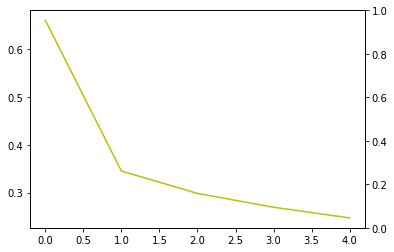

In [63]:
import matplotlib.pyplot as plt
fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [64]:
model.evaluate(xtest,ytest,batch_size=32)
print('cost : '+str(res[0]))
print('accuracy : '+str(res[1]))

10000/10000 [==============================] - 0s 18us/step
cost : 0.22991833183318378
accuracy : 0.9348000288009644


In [65]:
## callback() : 특정 상황에서 함수 내에서 또다른 함수 호출
from keras.callbacks import EarlyStopping
es = EarlyStopping()

In [42]:
hist = model.fit(xtrain,ytrain,epochs=3000,batch_size=10, validation_data=(xval,yval), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 113us/step - loss: 1.2591 - accuracy: 0.5129 - val_loss: 3.3829 - val_accuracy: 0.2433
Epoch 2/3000
700/700 [==============================] - 0s 114us/step - loss: 1.2582 - accuracy: 0.5114 - val_loss: 3.4305 - val_accuracy: 0.2400


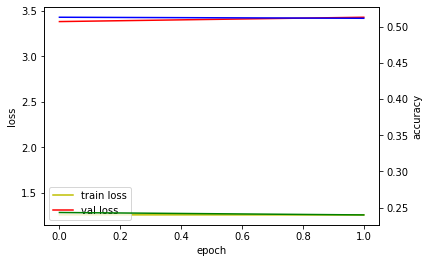

In [43]:
fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [66]:
es = EarlyStopping(patience=30)

hist = model.fit(xtrain,ytrain,epochs=3000,batch_size=10, validation_data=(xval,yval), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 131us/step - loss: 0.6806 - accuracy: 0.7457 - val_loss: 2.7458 - val_accuracy: 0.4367
Epoch 2/3000
700/700 [==============================] - 0s 111us/step - loss: 0.6807 - accuracy: 0.7486 - val_loss: 2.7392 - val_accuracy: 0.4367
Epoch 3/3000
700/700 [==============================] - 0s 107us/step - loss: 0.6798 - accuracy: 0.7500 - val_loss: 2.7606 - val_accuracy: 0.4300
Epoch 4/3000
700/700 [==============================] - 0s 113us/step - loss: 0.6803 - accuracy: 0.7471 - val_loss: 2.7517 - val_accuracy: 0.4300
Epoch 5/3000
700/700 [==============================] - 0s 107us/step - loss: 0.6800 - accuracy: 0.7471 - val_loss: 2.7631 - val_accuracy: 0.4300
Epoch 6/3000
700/700 [==============================] - 0s 97us/step - loss: 0.6800 - accuracy: 0.7471 - val_loss: 2.7459 - val_accuracy: 0.4367
Epoch 7/3000
700/700 [==============================] - 0s 96us/step - loss: 0.

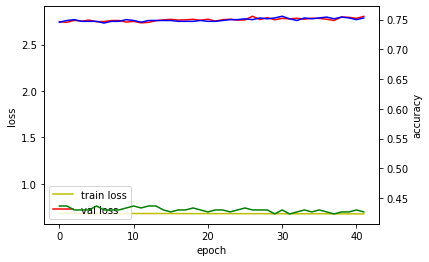

In [67]:
fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [77]:
import tensorflow as tf
import numpy as np
np.random.seed(123)
tf.set_random_seed(123)

path = r'C:\\Users\\student\\Desktop\\dataset\\python\\data'

data = np.loadtxt(path+'\\ThoraricSurgery.csv',delimiter=',')

In [78]:
data.shape

(470, 18)

In [79]:
x = data[:,0:17]
y = data[:,17]

model = Sequential()
model.add(Dense(30, input_dim=17,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [80]:
model.fit(x,y, epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 283us/step - loss: 0.6499 - accuracy: 0.3234
Epoch 2/30
470/470 [==============================] - 0s 91us/step - loss: 0.1499 - accuracy: 0.8489
Epoch 3/30
470/470 [==============================] - 0s 91us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 89us/step - loss: 0.1482 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 89us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 81us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 81us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 79us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 83us/step - loss: 0.1480 - accuracy: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 81us/step - loss: 0.1474 - accur

In [81]:
model.evaluate(x,y)

470/470 [==============================] - 0s 102us/step


[0.14693006873130798, 0.8510638475418091]